<a href="https://colab.research.google.com/github/dxda6216/q10/blob/main/circadian_period_q10_for_cyano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Circadian period Q<sub>10</sub> calculator for cyano


Temperature =  [25.6 26.4 26.8 27.4 27.6 28.1 28.6 29.1 29.6 29.8 30.5 30.6 30.8 31.
 31.1 31.4 31.6 31.7 31.8 32.  32.4 32.7 33.  33.5 33.8 34.1 34.3 34.9
 35.4]
Period =  [23.1 22.8 22.5 22.  22.  21.8 21.2 21.  20.7 20.6 20.6 20.4 20.4 20.2
 20.  19.7 19.9 19.6 19.7 19.1 19.2 19.1 18.9 18.8 18.7 18.5 18.1 18.5
 17.9] 

Dataset
Temp (°C)	Period (hours)
25.6	23.1
26.4	22.8
26.8	22.5
27.4	22.0
27.6	22.0
28.1	21.8
28.6	21.2
29.1	21.0
29.6	20.7
29.8	20.6
30.5	20.6
30.6	20.4
30.8	20.4
31.0	20.2
31.1	20.0
31.4	19.7
31.6	19.9
31.7	19.6
31.8	19.7
32.0	19.1
32.4	19.2
32.7	19.1
33.0	18.9
33.5	18.8
33.8	18.7
34.1	18.5
34.3	18.1
34.9	18.5
35.4	17.9

Fitted Curve
Temp (°C)	Period (hours)
22.000	25.479
22.085	25.421
22.171	25.364
22.256	25.306
22.342	25.249
22.427	25.192
22.513	25.135
22.598	25.078
22.683	25.021
22.769	24.964
22.854	24.907
22.940	24.851
23.025	24.795
23.111	24.738
23.196	24.682
23.281	24.626
23.367	24.571
23.452	24.515
23.538	24.459
23.623	24.404
23.709	24.349
23.794	24.294
23.879

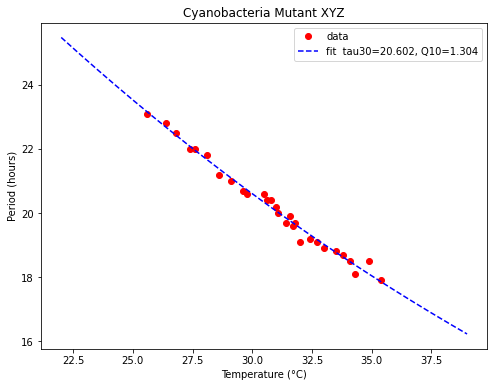

In [12]:
### This is a simple script to calculate Q10 values for circadian period
### length by using SciPy Optimize non-linear least squares fit on Colab.
### Copyright (c) 2022 by dxda6216 (dxda6216 AT gmail DOT com)
###
#@title Q10 calculator
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

# Data description (plot title)
Data_description = "Cyanobacteria Mutant XYZ" #@param {type:"string"}

# Temperature data
Temperatures = 25.6, 26.4, 26.8, 27.4, 27.6, 28.1, 28.6, 29.1, 29.6, 29.8, 30.5, 30.6, 30.8, 31, 31.1, 31.4, 31.6, 31.7, 31.8, 32, 32.4, 32.7, 33, 33.5, 33.8, 34.1, 34.3, 34.9, 35.4 #@param {type:"raw"}
x = np.array(Temperatures) 

# Period data
Periods =  23.1, 22.8, 22.5, 22, 22, 21.8, 21.2, 21, 20.7, 20.6, 20.6, 20.4, 20.4, 20.2, 20, 19.7, 19.9, 19.6, 19.7, 19.1, 19.2, 19.1, 18.9, 18.8, 18.7, 18.5, 18.1, 18.5, 17.9 #@param {type:"raw"}
y = np.array(Periods)

# Printing the data
print('Temperature = ', x)
print('Period = ', y, '\n')

# Displaying Tab-delimited data Yes or No
Display_tab_delimited_data = "Yes" #@param ["Yes", "No"]

# Defining an equation for curve fitting
# fitting parameters:
#     tau30 : period at 30 degree Celsius
#     q10 : temperature coefficient (Q10)
def func(x, tau30, q10):
	return tau30 / ( q10 ** ( ( x - 30 ) * 0.1 ) )

# Initial values for the fitting parameters
p0 = np.array([24.000, 1.000])

# Fitting the data to the defined equation
popt, pcov = curve_fit(func, x, y, p0)
residuals = y - func(x, *popt)
ss_residuals = np.sum(residuals**2)
ss_total = np.sum((y-np.mean(y))**2)
r_squared = 1 - ( ss_residuals / ss_total )

fig = plt.figure(figsize = (8,6))
fcxmin = int( min(x) - ( max(x) - min(x) ) * 0.333 )
fcxmax = int( max(x) + ( max(x) - min(x) ) * 0.333 ) + 1
fcx = np.linspace(fcxmin, fcxmax, 200)
	
plt.plot(x, y, 'o', color ='red', label ='data')
fcy = func(fcx, popt[0], popt[1])	
plt.plot(fcx, fcy, '--', color='blue', label ='fit  tau30=%5.3f, Q10=%5.3f' % tuple(popt))
plt.title(Data_description)
plt.xlabel(u'Temperature (\u00B0C)')
plt.ylabel('Period (hours)')

if Display_tab_delimited_data == "Yes":
	print(u'Dataset')
	print (u'Temp (\u00B0C)\tPeriod (hours)')
	ycount = 0
	for xseq in x:	
		print(str(xseq)+'\t'+str(y[ycount]))
		ycount += 1
	print(u'\nFitted Curve')
	print (u'Temp (\u00B0C)\tPeriod (hours)')
	fcycount = 0
	for fcxseq in fcx:	
		print('{:.3f}'.format(fcxseq)+'\t'+'{:.3f}'.format(fcy[fcycount]))
		fcycount += 1
	print(u'\n')

# Printing the results
print(u'Tau30 (estimated period length at 30\u00B0C) =', '{:.3f}'.format(popt[0]), u'\u00B1', '{:.3f}'.format(pcov[0,0]**0.5), 'hours')
print(u'Q10 (temperature coefficient) =', '{:.3f}'.format(popt[1]), u'\u00B1', '{:.3f}'.format(pcov[1,1]**0.5))
print(u'R\u00B2 =', '{:.6f}'.format(r_squared), u'\n')

plt.legend()
plt.show()

### End of script